<center>

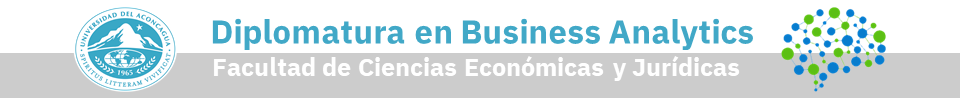

</center>

<center>
<font color="#41a8c7">
<h2><b>
Trabajo Final - Módulo 7 - Introducción a Python y Pandas

</font>
</center>

~~~
Russo Gaston
~~~

# Activar módulos necesarios

In [1]:
import pandas as pd
import numpy as np

# Obtener datos

In [2]:
url = "https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_07_Introduccion_a_Python/"
archivo = "Analisis_de_Facturas_de_Venta.csv"
ventas = url + archivo

# Crear un DataFrame

In [3]:
ventas = pd.read_csv(ventas)
ventas

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
0,B-0001-00000102,Etigand S.A.,27/12/19,Factura,Consultoria Web,50.0,5785.1240,289256.20,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,21/12/19,Factura,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos
2,A-0001-00000231,Amazon Group,10/12/19,Factura,Parlantes para PC,30.0,1990.0000,59700.00,Pesos Argentinos
3,A-0001-00000230,Amazon Group,6/12/19,Factura,Mercaderia de Reventa,30.0,10358.0000,310740.00,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,20/11/19,Factura,Consultoria Web,50.0,6300.0000,315000.00,Pesos Argentinos
...,...,...,...,...,...,...,...,...,...
154,A-0001-00000128,Hernandez S.A.,31/1/18,Factura,Dise–o Web,5.0,6300.0000,31500.00,Pesos Argentinos
155,B-0001-00000069,Etigand S.A.,25/1/18,Factura,Impresora Multifuncion,8.0,3553.7190,28429.75,Pesos Argentinos
156,B-0001-00000069,Etigand S.A.,25/1/18,Factura,Monitores,8.0,3305.7851,26446.28,Pesos Argentinos
157,B-0001-00000068,Ferrari Hnos S.A.,1/1/18,Factura,Impresora Multifuncion,10.0,3553.7190,35537.19,Pesos Argentinos


## Visualizaciones del DataFrame

In [4]:
ventas.head(6)

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
0,B-0001-00000102,Etigand S.A.,27/12/19,Factura,Consultoria Web,50.0,5785.1240,289256.20,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,21/12/19,Factura,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos
2,A-0001-00000231,Amazon Group,10/12/19,Factura,Parlantes para PC,30.0,1990.0000,59700.00,Pesos Argentinos
3,A-0001-00000230,Amazon Group,6/12/19,Factura,Mercaderia de Reventa,30.0,10358.0000,310740.00,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,20/11/19,Factura,Consultoria Web,50.0,6300.0000,315000.00,Pesos Argentinos
5,A-0001-00000228,Galardon S.A.,17/11/19,Factura,Impresora Multifuncion,23.0,10209.0000,234807.00,Pesos Argentinos


## Información del DataFrame y de los datos

In [5]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DOCUMENTO              159 non-null    object 
 1   ORGANIZACION           159 non-null    object 
 2   FECHA                  159 non-null    object 
 3   TIPOFACTURA            159 non-null    object 
 4   PRODUCTO               159 non-null    object 
 5   CANTIDAD               159 non-null    float64
 6   PRECIO                 159 non-null    float64
 7   IMPORTEMONTRANSACCION  159 non-null    float64
 8   MONEDA                 159 non-null    object 
dtypes: float64(3), object(6)
memory usage: 11.3+ KB


# Trabajando con el DataFrame

## Eliminando datos no disponibles y duplicados

In [6]:
ventas.fillna(value=0)

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
0,B-0001-00000102,Etigand S.A.,27/12/19,Factura,Consultoria Web,50.0,5785.1240,289256.20,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,21/12/19,Factura,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos
2,A-0001-00000231,Amazon Group,10/12/19,Factura,Parlantes para PC,30.0,1990.0000,59700.00,Pesos Argentinos
3,A-0001-00000230,Amazon Group,6/12/19,Factura,Mercaderia de Reventa,30.0,10358.0000,310740.00,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,20/11/19,Factura,Consultoria Web,50.0,6300.0000,315000.00,Pesos Argentinos
...,...,...,...,...,...,...,...,...,...
154,A-0001-00000128,Hernandez S.A.,31/1/18,Factura,Dise–o Web,5.0,6300.0000,31500.00,Pesos Argentinos
155,B-0001-00000069,Etigand S.A.,25/1/18,Factura,Impresora Multifuncion,8.0,3553.7190,28429.75,Pesos Argentinos
156,B-0001-00000069,Etigand S.A.,25/1/18,Factura,Monitores,8.0,3305.7851,26446.28,Pesos Argentinos
157,B-0001-00000068,Ferrari Hnos S.A.,1/1/18,Factura,Impresora Multifuncion,10.0,3553.7190,35537.19,Pesos Argentinos


In [7]:
ventas.drop(["TIPOFACTURA"], axis=1, inplace=True)
ventas.drop_duplicates()
ventas

,DOCUMENTO,ORGANIZACION,FECHA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
0,B-0001-00000102,Etigand S.A.,27/12/19,Consultoria Web,50.0,5785.1240,289256.20,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,21/12/19,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos
2,A-0001-00000231,Amazon Group,10/12/19,Parlantes para PC,30.0,1990.0000,59700.00,Pesos Argentinos
3,A-0001-00000230,Amazon Group,6/12/19,Mercaderia de Reventa,30.0,10358.0000,310740.00,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,20/11/19,Consultoria Web,50.0,6300.0000,315000.00,Pesos Argentinos
...,...,...,...,...,...,...,...,...
154,A-0001-00000128,Hernandez S.A.,31/1/18,Dise–o Web,5.0,6300.0000,31500.00,Pesos Argentinos
155,B-0001-00000069,Etigand S.A.,25/1/18,Impresora Multifuncion,8.0,3553.7190,28429.75,Pesos Argentinos
156,B-0001-00000069,Etigand S.A.,25/1/18,Monitores,8.0,3305.7851,26446.28,Pesos Argentinos
157,B-0001-00000068,Ferrari Hnos S.A.,1/1/18,Impresora Multifuncion,10.0,3553.7190,35537.19,Pesos Argentinos


## Insertando columnas

In [8]:
ventas.insert(7,column="IMPUESTOS",value= ventas.IMPORTEMONTRANSACCION * 0.21)

## Renombrando columnas

In [9]:
ventas.rename(columns={"IMPORTEMONTRANSACCION":"TOTAL", "ORGANIZACION": "CLIENTE", "DOCUMENTO":"NROFACTURA"}, 
              inplace=True)
ventas

,NROFACTURA,CLIENTE,FECHA,PRODUCTO,CANTIDAD,PRECIO,TOTAL,IMPUESTOS,MONEDA
0,B-0001-00000102,Etigand S.A.,27/12/19,Consultoria Web,50.0,5785.1240,289256.20,60743.8020,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,21/12/19,Honorarios,1.0,99586.7769,99586.78,20913.2238,Pesos Argentinos
2,A-0001-00000231,Amazon Group,10/12/19,Parlantes para PC,30.0,1990.0000,59700.00,12537.0000,Pesos Argentinos
3,A-0001-00000230,Amazon Group,6/12/19,Mercaderia de Reventa,30.0,10358.0000,310740.00,65255.4000,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,20/11/19,Consultoria Web,50.0,6300.0000,315000.00,66150.0000,Pesos Argentinos
...,...,...,...,...,...,...,...,...,...
154,A-0001-00000128,Hernandez S.A.,31/1/18,Dise–o Web,5.0,6300.0000,31500.00,6615.0000,Pesos Argentinos
155,B-0001-00000069,Etigand S.A.,25/1/18,Impresora Multifuncion,8.0,3553.7190,28429.75,5970.2475,Pesos Argentinos
156,B-0001-00000069,Etigand S.A.,25/1/18,Monitores,8.0,3305.7851,26446.28,5553.7188,Pesos Argentinos
157,B-0001-00000068,Ferrari Hnos S.A.,1/1/18,Impresora Multifuncion,10.0,3553.7190,35537.19,7462.8099,Pesos Argentinos


In [10]:
ventas["FECHA"] = pd.to_datetime(ventas.FECHA)
ventas.CANTIDAD = ventas.CANTIDAD.astype("int32")

ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   NROFACTURA  159 non-null    object        
 1   CLIENTE     159 non-null    object        
 2   FECHA       159 non-null    datetime64[ns]
 3   PRODUCTO    159 non-null    object        
 4   CANTIDAD    159 non-null    int32         
 5   PRECIO      159 non-null    float64       
 6   TOTAL       159 non-null    float64       
 7   IMPUESTOS   159 non-null    float64       
 8   MONEDA      159 non-null    object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(4)
memory usage: 10.7+ KB


## Reindexando index

In [11]:
ventas.reset_index(drop=True, inplace=True)
ventas.head()

,NROFACTURA,CLIENTE,FECHA,PRODUCTO,CANTIDAD,PRECIO,TOTAL,IMPUESTOS,MONEDA
0,B-0001-00000102,Etigand S.A.,2019-12-27,Consultoria Web,50,5785.1240,289256.20,60743.8020,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,2019-12-21,Honorarios,1,99586.7769,99586.78,20913.2238,Pesos Argentinos
2,A-0001-00000231,Amazon Group,2019-10-12,Parlantes para PC,30,1990.0000,59700.00,12537.0000,Pesos Argentinos
3,A-0001-00000230,Amazon Group,2019-06-12,Mercaderia de Reventa,30,10358.0000,310740.00,65255.4000,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,2019-11-20,Consultoria Web,50,6300.0000,315000.00,66150.0000,Pesos Argentinos


# Grabando

## Grabar el DataFrame como un archivo CSV

In [12]:
ventas.to_csv('ventas.csv')

# Gráficos

### Carga de librerías necesarias

In [13]:
import altair as alt
import matplotlib.pyplot as plt
import plotly.express as px

In [14]:
pd.read_csv("ventas.csv")
ventas.reset_index(drop=True, inplace=True)
ventas

,NROFACTURA,CLIENTE,FECHA,PRODUCTO,CANTIDAD,PRECIO,TOTAL,IMPUESTOS,MONEDA
0,B-0001-00000102,Etigand S.A.,2019-12-27,Consultoria Web,50,5785.1240,289256.20,60743.8020,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,2019-12-21,Honorarios,1,99586.7769,99586.78,20913.2238,Pesos Argentinos
2,A-0001-00000231,Amazon Group,2019-10-12,Parlantes para PC,30,1990.0000,59700.00,12537.0000,Pesos Argentinos
3,A-0001-00000230,Amazon Group,2019-06-12,Mercaderia de Reventa,30,10358.0000,310740.00,65255.4000,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,2019-11-20,Consultoria Web,50,6300.0000,315000.00,66150.0000,Pesos Argentinos
...,...,...,...,...,...,...,...,...,...
154,A-0001-00000128,Hernandez S.A.,2018-01-31,Dise–o Web,5,6300.0000,31500.00,6615.0000,Pesos Argentinos
155,B-0001-00000069,Etigand S.A.,2018-01-25,Impresora Multifuncion,8,3553.7190,28429.75,5970.2475,Pesos Argentinos
156,B-0001-00000069,Etigand S.A.,2018-01-25,Monitores,8,3305.7851,26446.28,5553.7188,Pesos Argentinos
157,B-0001-00000068,Ferrari Hnos S.A.,2018-01-01,Impresora Multifuncion,10,3553.7190,35537.19,7462.8099,Pesos Argentinos


### Ordenamiento por "FECHA"

In [15]:
ventas = ventas.sort_values(by="FECHA", ascending=True)
ventas

,NROFACTURA,CLIENTE,FECHA,PRODUCTO,CANTIDAD,PRECIO,TOTAL,IMPUESTOS,MONEDA
158,B-0001-00000068,Ferrari Hnos S.A.,2018-01-01,Monitores,8,3305.7851,26446.28,5553.7188,Pesos Argentinos
157,B-0001-00000068,Ferrari Hnos S.A.,2018-01-01,Impresora Multifuncion,10,3553.7190,35537.19,7462.8099,Pesos Argentinos
147,A-0001-00000133,Donadelli S.R.L,2018-01-03,Publicidad y Marketing,1,65000.0000,65000.00,13650.0000,Pesos Argentinos
137,A-0001-00000140,Berker S.R.L,2018-01-05,Consultoria Web,1,15000.0000,15000.00,3150.0000,Pesos Argentinos
130,B-0001-00000075,Javier Moroni,2018-01-06,Dise–o Web,1,13223.1405,13223.14,2776.8594,Pesos Argentinos
...,...,...,...,...,...,...,...,...,...
5,A-0001-00000228,Galardon S.A.,2019-11-17,Impresora Multifuncion,23,10209.0000,234807.00,49309.4700,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,2019-11-20,Consultoria Web,50,6300.0000,315000.00,66150.0000,Pesos Argentinos
41,A-0001-00000202,Nicolasen y Asociados S.A.,2019-12-04,Mercaderia de Reventa,25,2059.0000,51475.00,10809.7500,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,2019-12-21,Honorarios,1,99586.7769,99586.78,20913.2238,Pesos Argentinos


### Agrupamientos

In [16]:
ventas_dolares = ventas[ventas.MONEDA == "Dólares"]
ventas_pesos = ventas[ventas.MONEDA == "Pesos Argentinos"]

In [17]:
ventas_pesos

,NROFACTURA,CLIENTE,FECHA,PRODUCTO,CANTIDAD,PRECIO,TOTAL,IMPUESTOS,MONEDA
158,B-0001-00000068,Ferrari Hnos S.A.,2018-01-01,Monitores,8,3305.7851,26446.28,5553.7188,Pesos Argentinos
157,B-0001-00000068,Ferrari Hnos S.A.,2018-01-01,Impresora Multifuncion,10,3553.7190,35537.19,7462.8099,Pesos Argentinos
147,A-0001-00000133,Donadelli S.R.L,2018-01-03,Publicidad y Marketing,1,65000.0000,65000.00,13650.0000,Pesos Argentinos
137,A-0001-00000140,Berker S.R.L,2018-01-05,Consultoria Web,1,15000.0000,15000.00,3150.0000,Pesos Argentinos
130,B-0001-00000075,Javier Moroni,2018-01-06,Dise–o Web,1,13223.1405,13223.14,2776.8594,Pesos Argentinos
...,...,...,...,...,...,...,...,...,...
5,A-0001-00000228,Galardon S.A.,2019-11-17,Impresora Multifuncion,23,10209.0000,234807.00,49309.4700,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,2019-11-20,Consultoria Web,50,6300.0000,315000.00,66150.0000,Pesos Argentinos
41,A-0001-00000202,Nicolasen y Asociados S.A.,2019-12-04,Mercaderia de Reventa,25,2059.0000,51475.00,10809.7500,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,2019-12-21,Honorarios,1,99586.7769,99586.78,20913.2238,Pesos Argentinos


In [18]:
ventas_dolares

,NROFACTURA,CLIENTE,FECHA,PRODUCTO,CANTIDAD,PRECIO,TOTAL,IMPUESTOS,MONEDA
131,A-0001-00000143,Horizonte S.A.,2018-05-18,PC,4,600.0,2400.0,504.0,Dólares
81,A-0001-00000173,Klarkson,2018-10-22,Publicidad y Marketing,1,2000.0,2000.0,420.0,Dólares


In [19]:
clientes_dolares = ventas_dolares.groupby("CLIENTE").sum()
clientes_pesos = ventas_pesos.groupby("CLIENTE").sum()

In [20]:
clientes_pesos.insert(0,column="CLIENTE",value = clientes_pesos.index.values)
clientes_pesos.reset_index(drop=True, inplace=True)

In [21]:
clientes_dolares.insert(0,column="CLIENTE",value = clientes_dolares.index.values)
clientes_dolares.reset_index(drop=True, inplace=True)

In [22]:
clientes_pesos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CLIENTE    20 non-null     object 
 1   CANTIDAD   20 non-null     int32  
 2   PRECIO     20 non-null     float64
 3   TOTAL      20 non-null     float64
 4   IMPUESTOS  20 non-null     float64
dtypes: float64(3), int32(1), object(1)
memory usage: 848.0+ bytes


## Desarrollo gráficos del DataFrame

#### Análisis de ventas por "CLIENTE"

In [23]:
alt.Chart(clientes_pesos).mark_bar().encode(
  x="CLIENTE",
  y="TOTAL",
  color="TOTAL",).interactive()

alt.Chart(...)

In [24]:
print(plt.style.available) #Estilos disponibles

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [25]:
plt.style.use("seaborn-white")

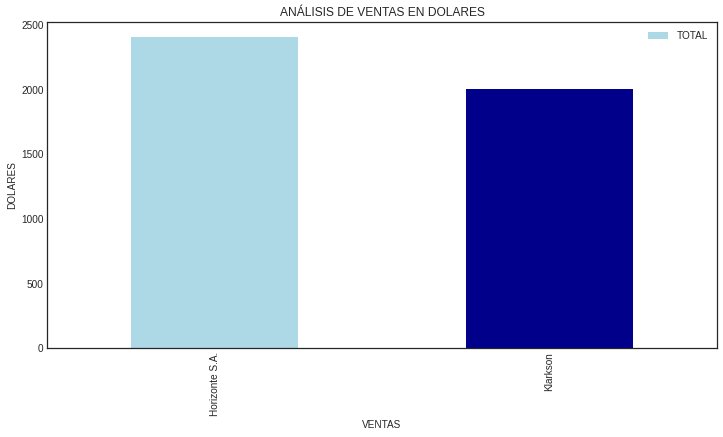

In [26]:
clientes_dolares.plot("CLIENTE","TOTAL", 
          kind="bar", 
          figsize=(12,6), 
          color=["lightblue","darkblue"], 
          title="ANÁLISIS DE VENTAS EN DOLARES", 
          ylabel = "DOLARES",
          xlabel = "VENTAS")

In [27]:
ventasxmoneda = ventas.groupby("MONEDA").sum()
ventasxmoneda

,CANTIDAD,PRECIO,TOTAL,IMPUESTOS
MONEDA,,,,
Dólares,5,2.600000e+03,4400.00,9.240000e+02
Pesos Argentinos,1169,3.816770e+06,9282294.36,1.949282e+06


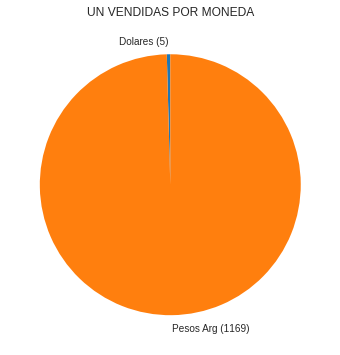

In [28]:
mylabels = ["Dolares (5)", "Pesos Arg (1169)"]

ventasxmoneda.plot("","CANTIDAD",
          kind="pie", 
          figsize=(6,6), 
          labels = mylabels,
          legend = "",
          ylabel = "",
          startangle = 90,
          title="UN VENDIDAS POR MONEDA")

#### Análisis de ventas en PESOS

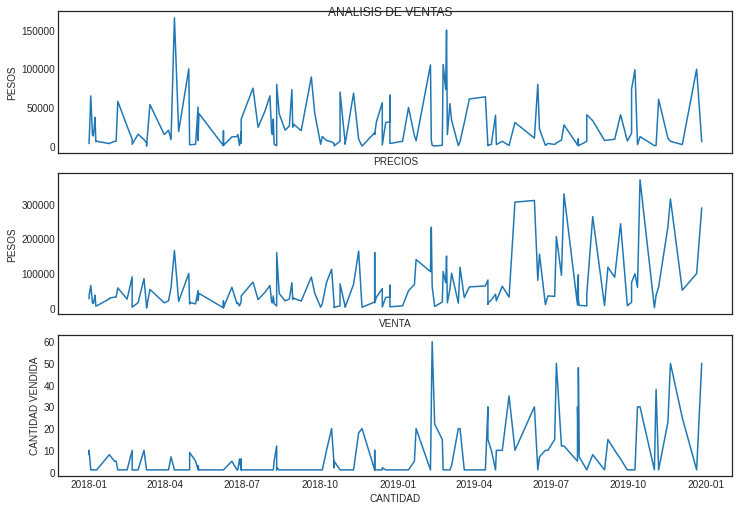

In [29]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7),sharex=True)

fig.suptitle("ANALISIS DE VENTAS")
fig.tight_layout()
#Grafico1
axs[0].plot(ventas_pesos.FECHA, ventas_pesos.PRECIO)
axs[0].set_xlabel("PRECIOS")
axs[0].set_ylabel("PESOS")

#Grafico2
axs[1].plot(ventas_pesos.FECHA, ventas_pesos.TOTAL)
axs[1].set_xlabel("VENTA")
axs[1].set_ylabel("PESOS")

#Grafico3
axs[2].plot(ventas_pesos.FECHA, ventas_pesos.CANTIDAD)
axs[2].set_xlabel("CANTIDAD")
axs[2].set_ylabel("CANTIDAD VENDIDA")

plt.show()

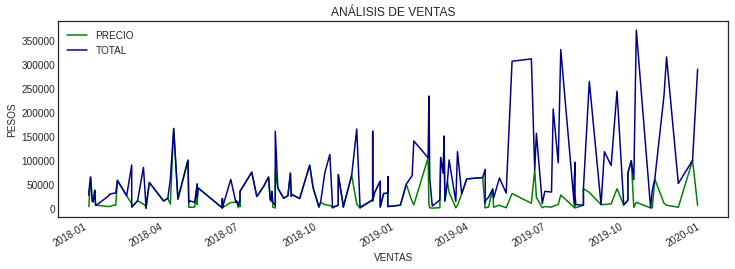

In [30]:
ventas_pesos.plot("FECHA",["PRECIO","TOTAL"], 
          kind="line", 
          figsize=(12,4), 
          color=["GREEN","darkblue"], 
          title="ANÁLISIS DE VENTAS", 
          ylabel = "PESOS",
          xlabel = "VENTAS")

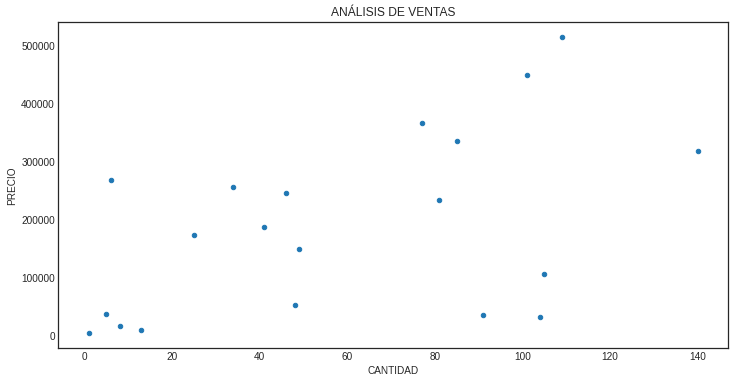

In [31]:
clientes_pesos.plot("CANTIDAD","PRECIO", 
          kind="scatter", 
          figsize=(12,6), 
          title="ANÁLISIS DE VENTAS")

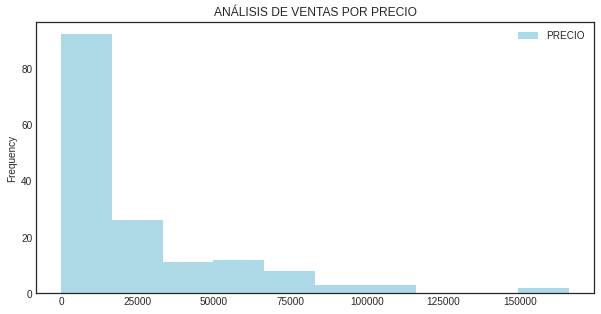

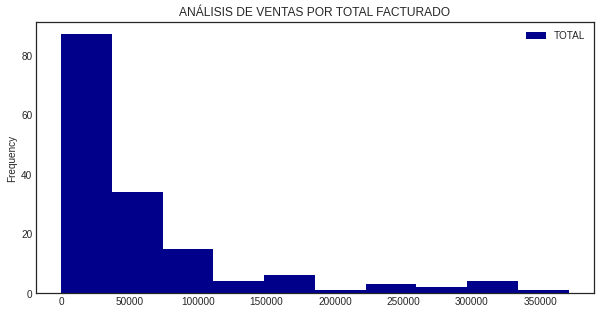

In [32]:
ventas_pesos.plot("FECHA","PRECIO",
         kind="hist",
         figsize=(10,5),
         color="lightblue",
         title="ANÁLISIS DE VENTAS POR PRECIO")

ventas_pesos.plot("FECHA","TOTAL",
         kind="hist",
         figsize=(10,5),
         color="darkblue",
         title="ANÁLISIS DE VENTAS POR TOTAL FACTURADO")


#### Análisis de variables PRECIO y TOTAL

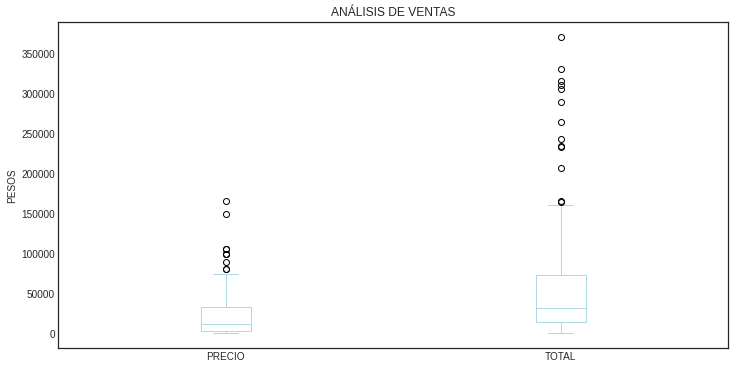

In [33]:
ventas_pesos.plot("FECHA",["PRECIO","TOTAL"], 
          kind="box", 
          figsize=(12,6), 
          color="lightblue", 
          title="ANÁLISIS DE VENTAS", 
          ylabel = "PESOS",
          xlabel = "VENTAS")

In [34]:
PRECIO = px.box(ventas_pesos, y="PRECIO",
                labels={"PRECIO":"Precio"},
                title="Boxplot - Precio")
PRECIO.show()

In [35]:
TOTAL = px.box(ventas_pesos, y="TOTAL",
                labels={"TOTAL":"Importe Facturado"},
                title="Boxplot - Total facturado")
TOTAL.show()

#### Análisis de ventas por "PRODUCTO"

In [36]:
productos_pesos = ventas_pesos.groupby("PRODUCTO").sum()

In [37]:
productos_pesos.insert(0,column="PRODUCTO",value = productos_pesos.index.values)
productos_pesos.reset_index(drop=True, inplace=True)
productos_pesos.info

<bound method DataFrame.info of                                              PRODUCTO  ...    IMPUESTOS
0                                Cable RGB para video  ...   17521.8624
1                                 Consultoria Digital  ...    3675.0000
2                                     Consultoria Web  ...  304052.0427
3                                          Dise–o Web  ...   70783.6143
4                                          Honorarios  ...  160646.4090
5                             Impresora Multifuncion   ...   78387.5274
6                                     Insumos oficina  ...   75483.3723
7                                  Intereses por Mora  ...    6130.7379
8                             Materia Prima Importada  ...    4200.0000
9                               Mercaderia de Reventa  ...  214593.7500
10                                         Mercadería  ...   34587.0000
11                                       Modem Router  ...    1313.4471
12                              

In [38]:
productos_pesos = productos_pesos.sort_values(by="CANTIDAD", ascending=True)

In [39]:
fig = px.bar(productos_pesos, x="PRODUCTO", y="CANTIDAD", color="PRECIO", 
             title="ANÁLISIS DE VENTAS POR PRODUCTO/PRECIO", width=1100)
for data in fig.data:
    data["width"] = 0.55
fig.show()